---
title: "Flood Watch Report – Maui Heavy Rainfall Analysis"
author: 
  - "Kytt MacManus, Raphael Sutiono, Francisco Sanchez, Mykola Dydych, Juan F. Martinez"
format: 
  html 
bibliography: m303-maui-flood-bibliography.bib
---


## Overview

In this lesson, you will analyze the **Flash Flood Watch for Maui** issued in January 15, 2024 due to prolonged, heavy rainfall. You will simulate rainfall data to evaluate flood risks across different regions of the island. This type of hazard analysis helps develop early-warning systems and improve response strategies for climate-related emergencies.

## Learning Objectives

By the end of this lesson, you should be able to:

- Understand the meteorological cause and risk factors of flash floods in Maui.
- Access and work with NASA rainfall data using Python.
- Compare NASA data and rain gauge data to see similarities.
- Use U.S. Cenus data to determine how many households were affected by the event.

## Introduction

Flash floods are sudden, powerful events that can occur when intense rain overwhelms drainage systems. On the early hours of **January 16, 2024**, the National Weather Service issued a **Flood Watch for Maui**, warning residents of potentially hazardous rainfall due to a slow-moving weather system [@mauinow2024showers].

Heavy rains, particularly over windward and wildfire-scarred slopes, threatened roads, homes, and infrastructure. This report explores the event using simulated rainfall data and visual  tools to assess possible flood impact zones.

### NASA Global Precipitation Measurement (GPM)

The **[Global Precipitation Measurement (GPM) IMERG Final Precipitation L3 Half Hourly 0.1 degree x 0.1 degree V07 (GPM_3IMERGHH)](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGHH_07/summary)** provides high-resolution multi-satellite precipitation estimates [@huffman2023imerg]. This dataset is produced by the Precipitation Processing System (PPS) at NASA's Goddard Space Flight Center (GSFC) and is distributed through the [Goddard Earth Sciences Data and Information Services Center (GES DISC)](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGHH_07/summary).



### NASA Earthaccess
 
NASA's `earthaccess` is a Python library designed to simplify the process of searching, accessing, and downloading Earth science data from NASA's repositories. It integrates seamlessly with [**NASA's Earthdata Login**](https://urs.earthdata.nasa.gov/) system, allowing users to authenticate and interact with various datasets programmatically.

A NASA Earthdata Login profile is required to access Earthdata datasets for this lesson. 


### Open Street Map

[OpenStreetMap (OSM)](https://www.openstreetmap.org/) is a collaborative project that creates a free, editable map of the world, built entirely by a community of mappers. In Python, the osmnx library provides a powerful interface for querying and analyzing OSM data, including administrative boundaries, road networks, and building footprints.

In this lesson, we use `osmnx` to retrieve the geographic boundary of Hawaii from OSM and extract its bounding box to spatially filter satellite precipitation data.



## Data Analysis

::: {.callout-tip style="color: #5a7a2b;"}
#### Data Science Review

Before beginning, please note that this lesson uses the Python programming language and the following Python packages:


-   [`os`](https://docs.python.org/3/library/os.html): Provides a portable way to interact with the operating system, including file system operations and environment variables.

-   [`re`](https://docs.python.org/3/library/re.html): Enables powerful string pattern matching and text processing using regular expressions.

-   [`datetime`](https://docs.python.org/3/library/datetime.html): Used to manipulate dates and times, including timedelta arithmetic for time-based analysis.

-   [`numpy`](https://numpy.org/): Foundational package for scientific computing in Python, supporting array operations and numerical computation.

-   [`pandas`](https://pandas.pydata.org/): Offers data structures and functions for handling, analyzing, and visualizing structured data.

-   [`xarray`](https://docs.xarray.dev/): Enables working with labeled multi-dimensional arrays, ideal for processing NetCDF and other gridded scientific data.

-   [`matplotlib.pyplot`](https://matplotlib.org/stable/api/pyplot_api.html): Core plotting library for generating static, interactive, and animated visualizations in Python.

-   [`matplotlib.animation`](https://matplotlib.org/stable/api/animation_api.html): Provides tools for creating animated plots and time series visualizations.

-   [`osmnx`](https://osmnx.readthedocs.io/): Enables downloading, visualizing, and analyzing street networks and other OpenStreetMap data.

-   [`rasterio.transform`](https://rasterio.readthedocs.io/en/latest/topics/transforms.html): Supports creation and manipulation of geospatial raster transforms for coordinate referencing.

-   [`rasterstats`](https://pythonhosted.org/rasterstats/): Computes summary statistics of raster datasets over vector geometries for spatial analysis.

-   [`earthaccess`](https://earthaccess.readthedocs.io/): Simplifies NASA Earthdata access by managing authentication and dataset queries in a user-friendly way.



:::


In [1]:
import os
import re
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import osmnx as ox
from rasterio.transform import from_origin
from rasterstats import zonal_stats

import earthaccess


Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF5.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF5.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF5Image.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF5Image.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_netCDF.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_netCDF.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\ogr_FileGDB.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\ogr_FileGDB.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF5.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF5.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF5Image.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF5Image.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_KEA.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_netCDF.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_netCDF.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\ogr_FileGDB.dll
127: The specified procedure could not be found.



Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\ogr_FileGDB.dll
127: The specified procedure could not be found.



The earthaccess library simplifies the process of accessing NASA Earthdata by handling authentication and data discovery. Before you can search or download data using earthaccess, you need to authenticate using your Earthdata Login credentials. The `earthaccess.login()` function is the starting point for this process.


In [2]:
#| eval: false
 
# Authenticate with Earthdata using your Earthdata Login credentials
# This will prompt for username/password or use existing credentials  
 earthaccess.login()

To retrieve NASA precipitation data for Hawaii using earthaccess, we begin by querying geographic boundary data from OpenStreetMap using osmnx, then extract the bounding box for the region. This bounding box is used to search for GPM IMERG half-hourly precipitation data for a specific date range. 


In [3]:
# Query Hawaii boundary from OSM  
hawaii = ox.geocode_to_gdf("Hawaii, USA")


# Extract bounding box as (lon_min, lat_min, lon_max, lat_max)
bbox = hawaii.total_bounds  # [minx, miny, maxx, maxy]
bounding_box = (bbox[0], bbox[1], bbox[2], bbox[3])

Search for GPM IMERG Half-Hourly Precipitation Data:


In [4]:
# Search for GPM IMERG Half-Hourly Level 3 data using earthaccess
results = earthaccess.search_data(
    short_name="GPM_3IMERGHH",     # Dataset short name
    version="07",                  # Dataset version
    temporal=("2024-01-16", "2024-01-17"),  # Example date range
    bounding_box=bounding_box      # Geographic bounding box for Hawaii
)

# Extract data download links from search results
all_urls = [granule.data_links()[0] for granule in results]

# Print number of URLs found
print(len(all_urls), "URLs found.")


96 URLs found.


Finally, this code will download and create a list of the file paths of the downloaded data from `earthaccess`:

In [5]:
#| eval: false
#| 
file_path = earthaccess.download(all_urls)

In [6]:
#|include: false



folder= r"F:\TOPSSCHOOL\git\TOPSTSCHOOL-disasters\data\2025-07-07-47e9ab"

file_path= [os.path.join(folder, f) for f in os.listdir(folder) if \
 os.path.isfile(os.path.join(folder, f))]
print(file_path)


['F:\\TOPSSCHOOL\\git\\TOPSTSCHOOL-disasters\\data\\2025-07-07-47e9ab\\3B-HHR.MS.MRG.3IMERG.20240116-S000000-E002959.0000.V07B.HDF5', 'F:\\TOPSSCHOOL\\git\\TOPSTSCHOOL-disasters\\data\\2025-07-07-47e9ab\\3B-HHR.MS.MRG.3IMERG.20240116-S003000-E005959.0030.V07B.HDF5', 'F:\\TOPSSCHOOL\\git\\TOPSTSCHOOL-disasters\\data\\2025-07-07-47e9ab\\3B-HHR.MS.MRG.3IMERG.20240116-S010000-E012959.0060.V07B.HDF5', 'F:\\TOPSSCHOOL\\git\\TOPSTSCHOOL-disasters\\data\\2025-07-07-47e9ab\\3B-HHR.MS.MRG.3IMERG.20240116-S013000-E015959.0090.V07B.HDF5', 'F:\\TOPSSCHOOL\\git\\TOPSTSCHOOL-disasters\\data\\2025-07-07-47e9ab\\3B-HHR.MS.MRG.3IMERG.20240116-S020000-E022959.0120.V07B.HDF5', 'F:\\TOPSSCHOOL\\git\\TOPSTSCHOOL-disasters\\data\\2025-07-07-47e9ab\\3B-HHR.MS.MRG.3IMERG.20240116-S023000-E025959.0150.V07B.HDF5', 'F:\\TOPSSCHOOL\\git\\TOPSTSCHOOL-disasters\\data\\2025-07-07-47e9ab\\3B-HHR.MS.MRG.3IMERG.20240116-S030000-E032959.0180.V07B.HDF5', 'F:\\TOPSSCHOOL\\git\\TOPSTSCHOOL-disasters\\data\\2025-07-07-47e9ab

### Visualizing Precipitation Data

Once we’ve downloaded the GPM IMERG precipitation data, we can use `xarray` to open the **NetCDF** file and subset it to the region of interest (in this case, Hawaii). This subset is then visualized using `matplotlib` and xarray’s built-in plotting utilities to generate a precipitation map for the first available half-hourly time step.


96 observations found.


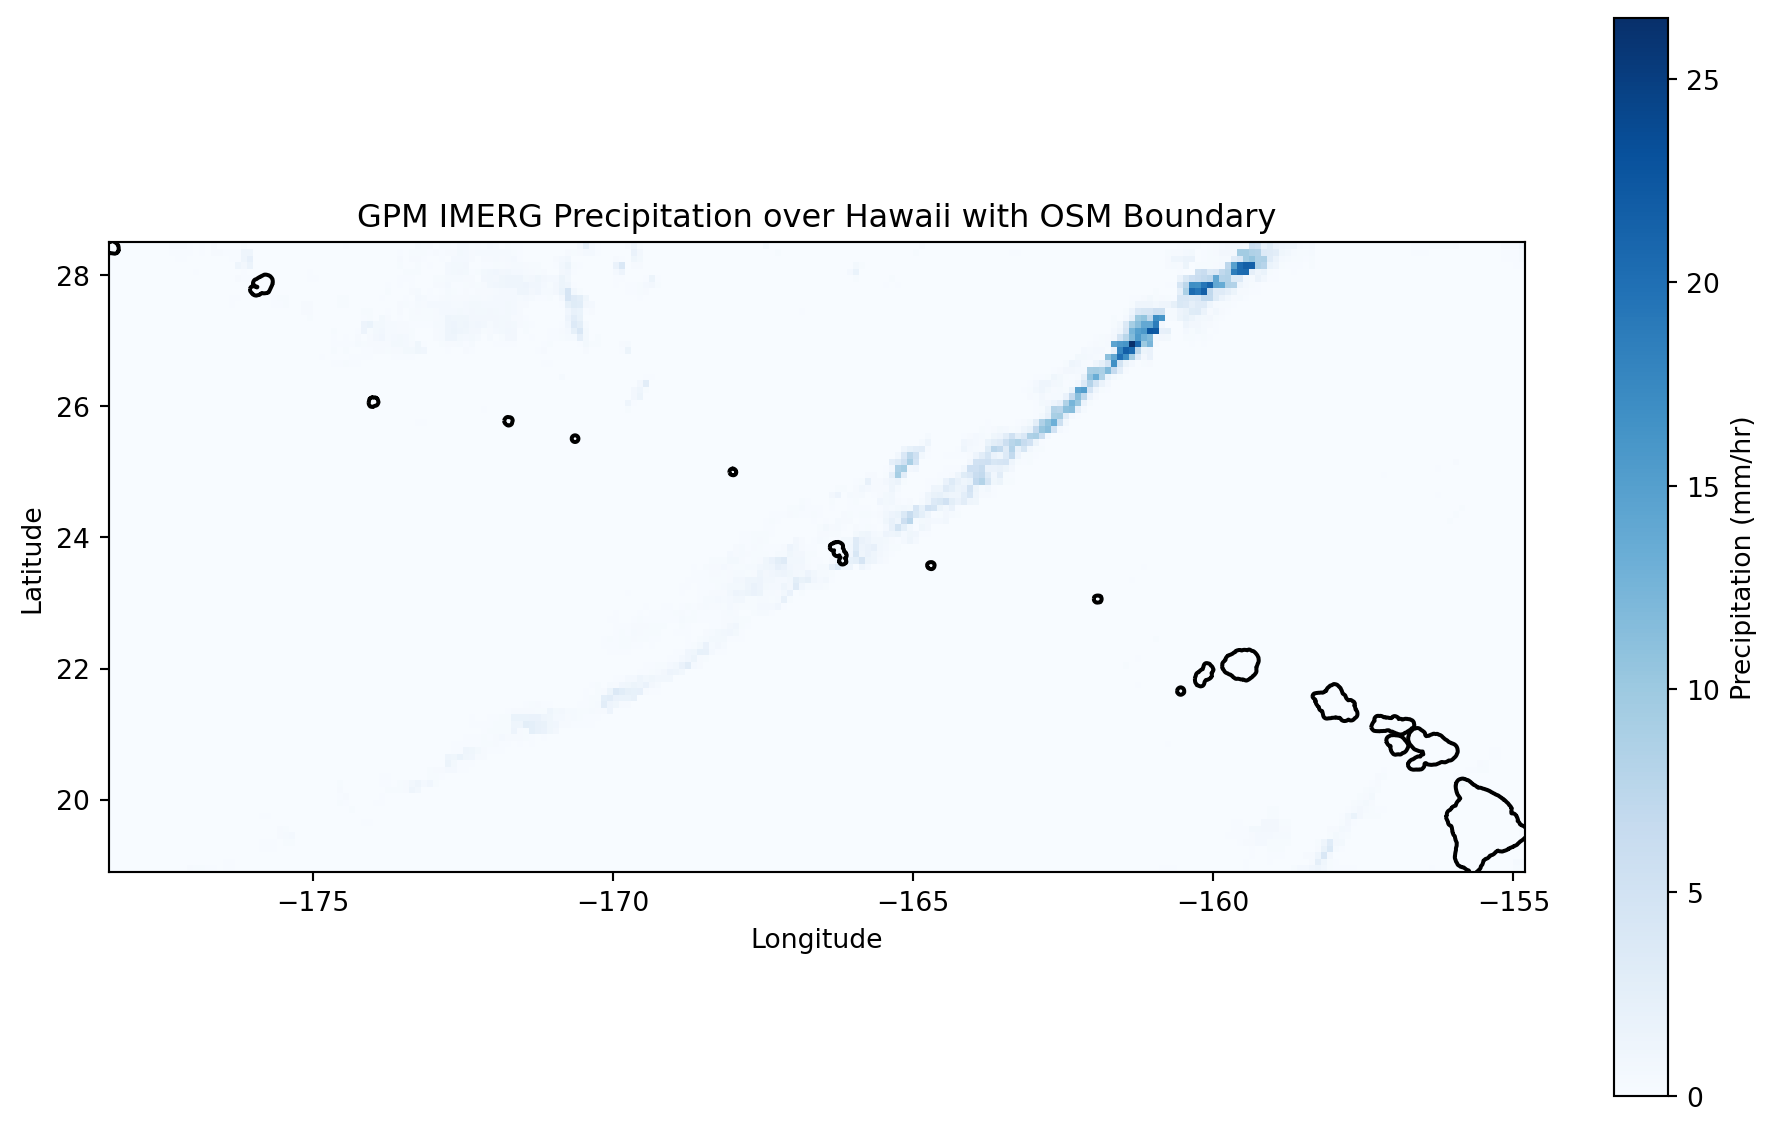

In [7]:
# Display the number of observations (files) found
print(len(file_path), "observations found.")

# Open the selected GPM IMERG dataset (e.g., 16th file in list)
with xr.open_dataset(file_path[15], engine="h5netcdf", group="Grid") as ds:

    # Subset the precipitation variable to the Hawaii bounding box
    precip_subset = ds["precipitation"].sel(
        lat=slice(bounding_box[1], bounding_box[3]),
        lon=slice(bounding_box[0], bounding_box[2])
    )

    # Select the first time step and reorient data for plotting
    data = precip_subset.isel(time=0)
    data = data.transpose("lat", "lon")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the precipitation data
data.plot(ax=ax, cmap="Blues", cbar_kwargs={"label": "Precipitation (mm/hr)"})

# Overlay the Hawaii boundary geometry from OSM
hawaii.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5)

# Add plot labels and formatting
plt.title("GPM IMERG Precipitation over Hawaii with OSM Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


## Animation: Visualizing Half-Hourly Rainfall Over Time

To understand how precipitation evolves over time, we can animate the sequence of GPM IMERG half-hourly rainfall images. This animation cycles through each file, extracts the timestamp, overlays the precipitation data on the Hawaii boundary, and renders a smooth temporal visualization using `matplotlib.animation`. This is especially helpful for spotting storm patterns and tracking rainfall intensity across the region.


In [8]:
#| eval: false

# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Load first dataset 
# Open the first NetCDF file using xarray
with xr.open_dataset(file_path[0], engine="h5netcdf", group="Grid") as ds:
    
    # Subset the precipitation variable by latitude and longitude bounds
    data0 = ds["precipitation"].sel(
        lat=slice(bounding_box[1], bounding_box[3]),    # min_lat to max_lat
        lon=slice(bounding_box[0], bounding_box[2])     # min_lon to max_lon
    ).isel(time=0).transpose("lat", "lon")              # Select first time step and orient for plotting

    # Extract longitude and latitude values as 1D arrays
    lon = data0.lon.values
    lat = data0.lat.values

    # Create 2D meshgrid from lat/lon arrays for plotting
    lon2d, lat2d = np.meshgrid(lon, lat)

    # Plot the initial frame with pcolormesh and add color shading
    mesh = ax.pcolormesh(lon2d, lat2d, data0.values, cmap="Blues", shading="auto")

    # Add a colorbar to indicate precipitation scale
    cbar = fig.colorbar(mesh, ax=ax, label="Precipitation (mm/hr)")

# Overlay the Hawaii boundary outline from OSM data
hawaii.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5, zorder=2)

# Add static plot title with frame info
title_text = ax.set_title(f"GPM IMERG Precipitation over Hawaii - Frame 1/{len(file_path)}")

# Set axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Auto-adjust layout to prevent overlap of labels and plot
plt.tight_layout()

# --- Define update function for animation ---

def update(frame_index):
    # Get the file for the current frame
    file = file_path[frame_index]

    # Open and subset the current file's data
    with xr.open_dataset(file, engine="h5netcdf", group="Grid") as ds:
        data = ds["precipitation"].sel(
            lat=slice(bounding_box[1], bounding_box[3]),  # Subset latitude
            lon=slice(bounding_box[0], bounding_box[2])   # Subset longitude
        ).isel(time=0).transpose("lat", "lon")            # Select first time slice and orient for plotting

    # Extract filename from full path
    filename = os.path.basename(file)

    # Use regex to extract date (YYYYMMDD) from filename
    match = re.search(r"3IMERG\.(\d{8})", filename)
    date_str = match.group(1)

    # Use regex to extract time (HHMM) from filename
    match = re.search(r"(\d{4}).V07B", filename)
    time_str = match.group(1)
    time_str = int(time_str)  # Convert to integer (minutes)

    # Convert extracted date/time to a datetime object in Hawaii Standard Time (HST)
    try: 
        datetime_obj = datetime.strptime(date_str, "%Y%m%d")           # Parse date string
        datetime_obj = datetime_obj + timedelta(minutes=time_str)      # Add minutes offset
        datetime_obj = datetime_obj - timedelta(hours=10)              # Convert UTC to HST
        timestamp_str = datetime_obj.strftime("%Y-%m-%d %H:%M:%S HST") # Format timestamp string

    except ValueError:
        # Handle parsing errors
        timestamp_str = f"Invalid time in filename: {time_str}"

    # Update the plot data with the current frame
    mesh.set_array(data.values.ravel())

    # Update the title with the new timestamp
    title_text.set_text(f"GPM IMERG Precipitation over Hawaii — {timestamp_str}")

    # Return updated elements for blitting
    return mesh, title_text

# --- Create the animation ---

print("Creating animation...")

ani = animation.FuncAnimation(
    fig,                # Target figure object
    update,             # Function to call for each frame
    frames=len(file_path), # Total number of frames (data files)
    interval=200,       # Delay between frames in milliseconds
    blit=True,          # Only redraw changed elements for efficiency
    repeat=False        # Stop at the last frame
)

# --- Save the animation as a GIF ---

ani.save("data/images/hawaii_precip.gif", writer="pillow", fps=3)  # Save at 3 frames per second


![Hawaii GIF](data/images/hawaii_precip.gif)

 
#### Focusing on Maui

To focus analysis on our location of analysis, we use `osmnx` to retrieve the geographic boundary for Maui County, Hawaii from **OpenStreetMap**. We then extract its bounding box and apply a small buffer (0.1 degrees) to ensure that nearby data just outside the strict boundary is included. This padded extent will be used to spatially filter satellite precipitation data or other geospatial layers relevant to the region.


In [9]:
# Get the geometry for Maui County, Hawaii from OpenStreetMap
maui = ox.geocode_to_gdf("Maui County, Hawaii, USA").to_crs("EPSG:4326")

# Extract the bounding box of Maui County as (minx, miny, maxx, maxy)
bounding_box = maui.total_bounds

# Define a small padding buffer (in degrees) around the bounding box
pad = 0.1  # ~0.1 degrees ≈ 5–6 km buffer

# Compute padded latitude and longitude boundaries
lat_min = bounding_box[1] - pad  # Southern boundary
lat_max = bounding_box[3] + pad  # Northern boundary
lon_min = bounding_box[0] - pad  # Western boundary
lon_max = bounding_box[2] + pad  # Eastern boundary


After defining the padded bounding box for Maui, we can visualize GPM IMERG half-hourly precipitation data for that area. This plot overlays satellite-derived rainfall intensity on the island’s geographic outline using `xarray` and `matplotlib`, providing spatial context for localized precipitation events.


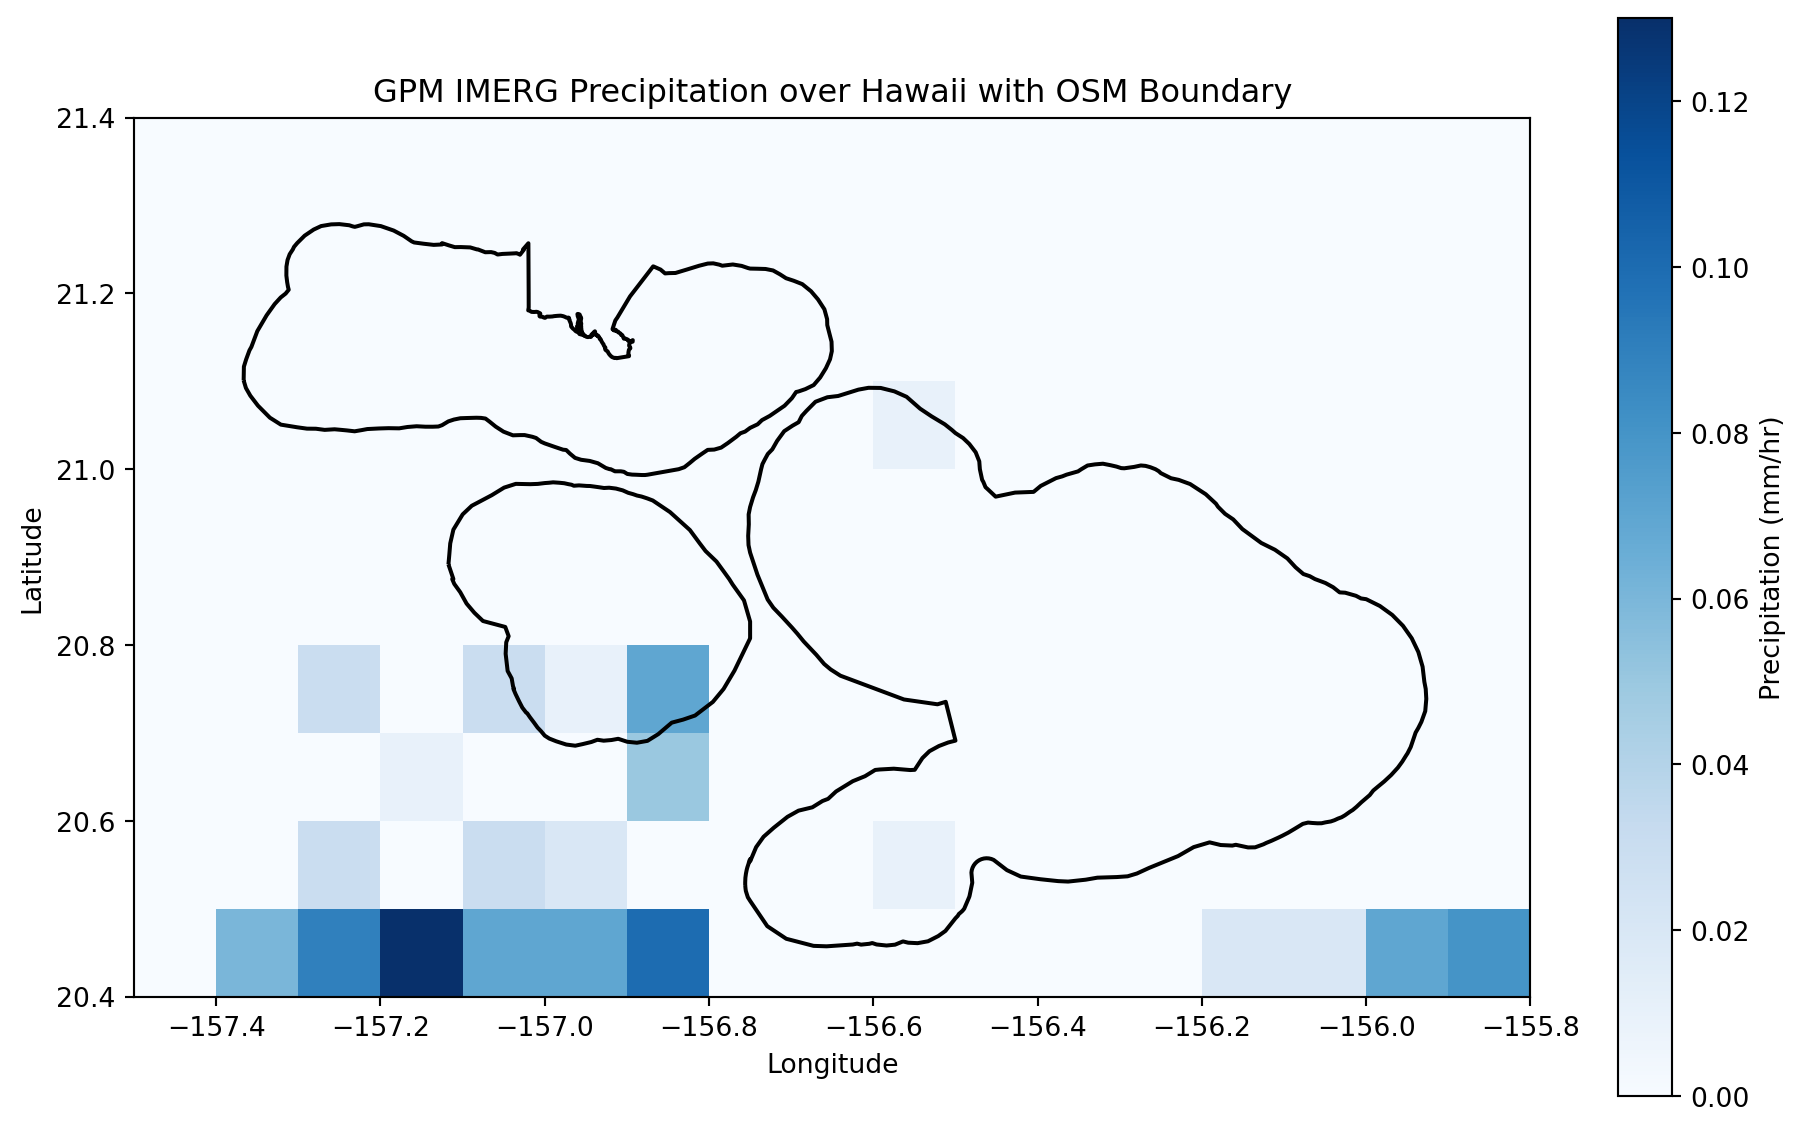

In [10]:
# Open the 16th GPM IMERG data file and extract the "Grid" group
with xr.open_dataset(file_path[15], engine="h5netcdf", group="Grid") as ds:
    
    # Subset the precipitation variable using the padded Maui bounding box
    precip_subset = ds["precipitation"].sel(
        lat=slice(lat_min, lat_max),   # Latitude range from bounding box
        lon=slice(lon_min, lon_max)    # Longitude range from bounding box
    )

    # Select the first time step in the file
    data = precip_subset.isel(time=0)

    # Rearrange dimensions for plotting: lat first, then lon
    data = data.transpose("lat", "lon")

# Initialize figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the precipitation data on the map
data.plot(ax=ax, cmap="Blues", cbar_kwargs={"label": "Precipitation (mm/hr)"})

# Overlay the Maui County boundary using OSM data
maui.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5)

# Add plot title and axis labels
plt.title("GPM IMERG Precipitation over Hawaii with OSM Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


To visualize how rainfall evolves across Maui County, this animation cycles through a sequence of GPM IMERG half-hourly datasets. For each frame, it subsets the data to the Maui region, overlays the county boundary, and updates the timestamp extracted from the filename. The animation is then saved as a `.gif` for easy sharing and visual analysis.


In [11]:
#| eval: false

# Initialize the figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 6))

# Inform the user that we're starting the first frame setup
print("Initializing plot with first data file...")

# Extract longitude and latitude from the preloaded 'data' array
lon = data.lon.values                       # 1D longitude array
lat = data.lat.values                       # 1D latitude array

# Create 2D coordinate grids from the lat/lon arrays
lon2d, lat2d = np.meshgrid(lon, lat)

# Create the first pcolormesh using initial data values
mesh = ax.pcolormesh(
    lon2d, lat2d, data.values,              # Coordinates and initial data
    cmap="Blues", shading="auto"           # Colormap and smoothing style
)

# Add a colorbar to show precipitation intensity
cbar = fig.colorbar(mesh, ax=ax, label="Precipitation (mm/hr)")

# Overlay Maui County's boundary for spatial context
maui.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5, zorder=2)

# Set static elements for the plot: title and axis labels
title_text = ax.set_title(f"GPM IMERG Precipitation over Hawaii - Frame 1/{len(file_path)}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()  # Optimize spacing to prevent overlap

# --- Define the animation update function ---

def update(frame_index):
    # Get the file corresponding to the current animation frame
    file = file_path[frame_index]

    # Open and subset the dataset for Maui bounding box
    with xr.open_dataset(file, engine="h5netcdf", group="Grid") as ds:
        data = ds["precipitation"].sel(
            lat=slice(lat_min, lat_max),   # Subset latitude
            lon=slice(lon_min, lon_max)    # Subset longitude
        ).isel(time=0).transpose("lat", "lon")  # Select first timestep and rearrange dimensions

    # Extract the base filename (no directory)
    filename = os.path.basename(file)

    # Extract date string (YYYYMMDD) from filename using regex
    match = re.search(r"3IMERG\.(\d{8})", filename)
    date_str = match.group(1)

    # Extract time offset (HHMM in minutes) from filename
    match = re.search(r"(\d{4}).V07B", filename)
    time_str = match.group(1)
    time_str = int(time_str)  # Convert to integer

    # Attempt to convert extracted date and time to formatted timestamp
    try: 
        datetime_obj = datetime.strptime(date_str, "%Y%m%d")       # Parse date
        datetime_obj += timedelta(minutes=time_str)                # Add time offset
        datetime_obj -= timedelta(hours=10)                        # Convert from UTC to HST
        timestamp_str = datetime_obj.strftime("%Y-%m-%d %H:%M:%S HST")  # Format timestamp
    except ValueError:
        # Handle invalid or missing time values
        timestamp_str = f"Invalid time in filename: {time_str}"

    # Update plot with new data values and title
    mesh.set_array(data.values.ravel())  # Flatten the data into 1D for pcolormesh
    title_text.set_text(f"GPM IMERG Precipitation over Hawaii — {timestamp_str}")

    return mesh, title_text  # Return updated elements for blitting

# --- Generate the animation ---

print("Creating animation...")

ani = animation.FuncAnimation(
    fig,            # The figure object to update
    update,         # The update function called per frame
    frames=len(file_path),  # Number of frames = number of files
    interval=200,   # Delay between frames (ms)
    blit=True,      # Use blitting for efficient updates
    repeat=False    # Run only once
)

# --- Save the animation as a GIF ---

ani.save("data/images/maui_precip.gif", writer="pillow", fps=3)  # Save to file at 3 frames per second

![Maui GIF](data/images/maui_precip.gif)

### Extracting Time Series of Mean Precipitation Over Maui


We can use the GPM IMERG half-hourly precipitation files to calculates the mean rainfall over Maui County for each timestep. The data is spatially subset to the OSM Maui bounding box, rasterized using a *geographic transform*, and then aggregated over the island polygon using the function `zonal_stats`. Results are compiled into a *DataFrame* for further analysis or plotting.


In [12]:
# Prepare an empty list to store the results for each file
results = []

# Loop through each file in the downloaded GPM IMERG dataset
for file in file_path:
    try:
        # --- Open and subset precipitation data ---
        with xr.open_dataset(file, engine="h5netcdf", group="Grid") as ds:
            # Select and subset precipitation for Maui bounding box
            data = ds["precipitation"].sel(
                lat=slice(lat_min, lat_max),     # Latitude bounds
                lon=slice(lon_min, lon_max)      # Longitude bounds
            ).isel(time=0).transpose("lat", "lon")  # First timestep and axis order for raster analysis

        # --- Build affine transform for georeferencing raster ---
        lats = data["lat"].values              # Latitude array
        lons = data["lon"].values              # Longitude array
        res_x = lons[1] - lons[0]              # Pixel width
        res_y = lats[1] - lats[0]              # Pixel height (note: no flip needed if ordered from top to bottom)
        transform = from_origin(
            west=lons.min(),                   # Western edge
            north=lats.max(),                  # Northern edge
            xsize=res_x,                       # Horizontal resolution
            ysize=res_y                        # Vertical resolution
        )

        # --- Extract raw array of precipitation values ---
        arr = data.values                      # 2D array (lat × lon)

        # --- Parse datetime from filename ---
        filename = os.path.basename(file)      # Extract base filename
        match_date = re.search(r"3IMERG\.(\d{8})", filename)   # Extract date string (YYYYMMDD)
        match_min = re.search(r"\.(\d{4,5})\.V", filename)     # Extract time in minutes

        if match_date and match_min:
            date_str = match_date.group(1)
            mins_str = match_min.group(1)
            dt = datetime.strptime(date_str, "%Y%m%d") + timedelta(minutes=int(mins_str))  # Combine date and time
            dt = dt - timedelta(hours=10)      # Convert from UTC to Hawaii Standard Time
        else:
            dt = None                          # Fallback if parsing fails

        # --- Compute zonal mean over the Maui polygon ---
        stats = zonal_stats(
            maui,                              # Polygon geometry
            arr,                               # Raster array
            affine=transform,                  # Spatial transform
            stats="mean",                      # Compute mean value
            nodata=np.nan                      # Handle missing values
        )[0]

        # Extract mean precipitation value from the stats result
        mean_precip = stats["mean"]

        # Append timestamp and mean to results list
        results.append({
            "datetime": dt,
            "mean_precip": mean_precip
        })

    except Exception as e:
        # Catch and report any errors (e.g., malformed file or data)
        print(f"Skipping file {file} due to error: {e}")

# --- Convert results list to a clean DataFrame ---
results_df = pd.DataFrame(results)  # Each row: [datetime, mean_precip]

Now that we’ve extracted mean precipitation values for each GPM IMERG file, we can visualize how rainfall changes over time across Maui County. This line plot presents a temporal snapshot of precipitation intensity, helping to identify storm events, rainfall variability, and dry periods.


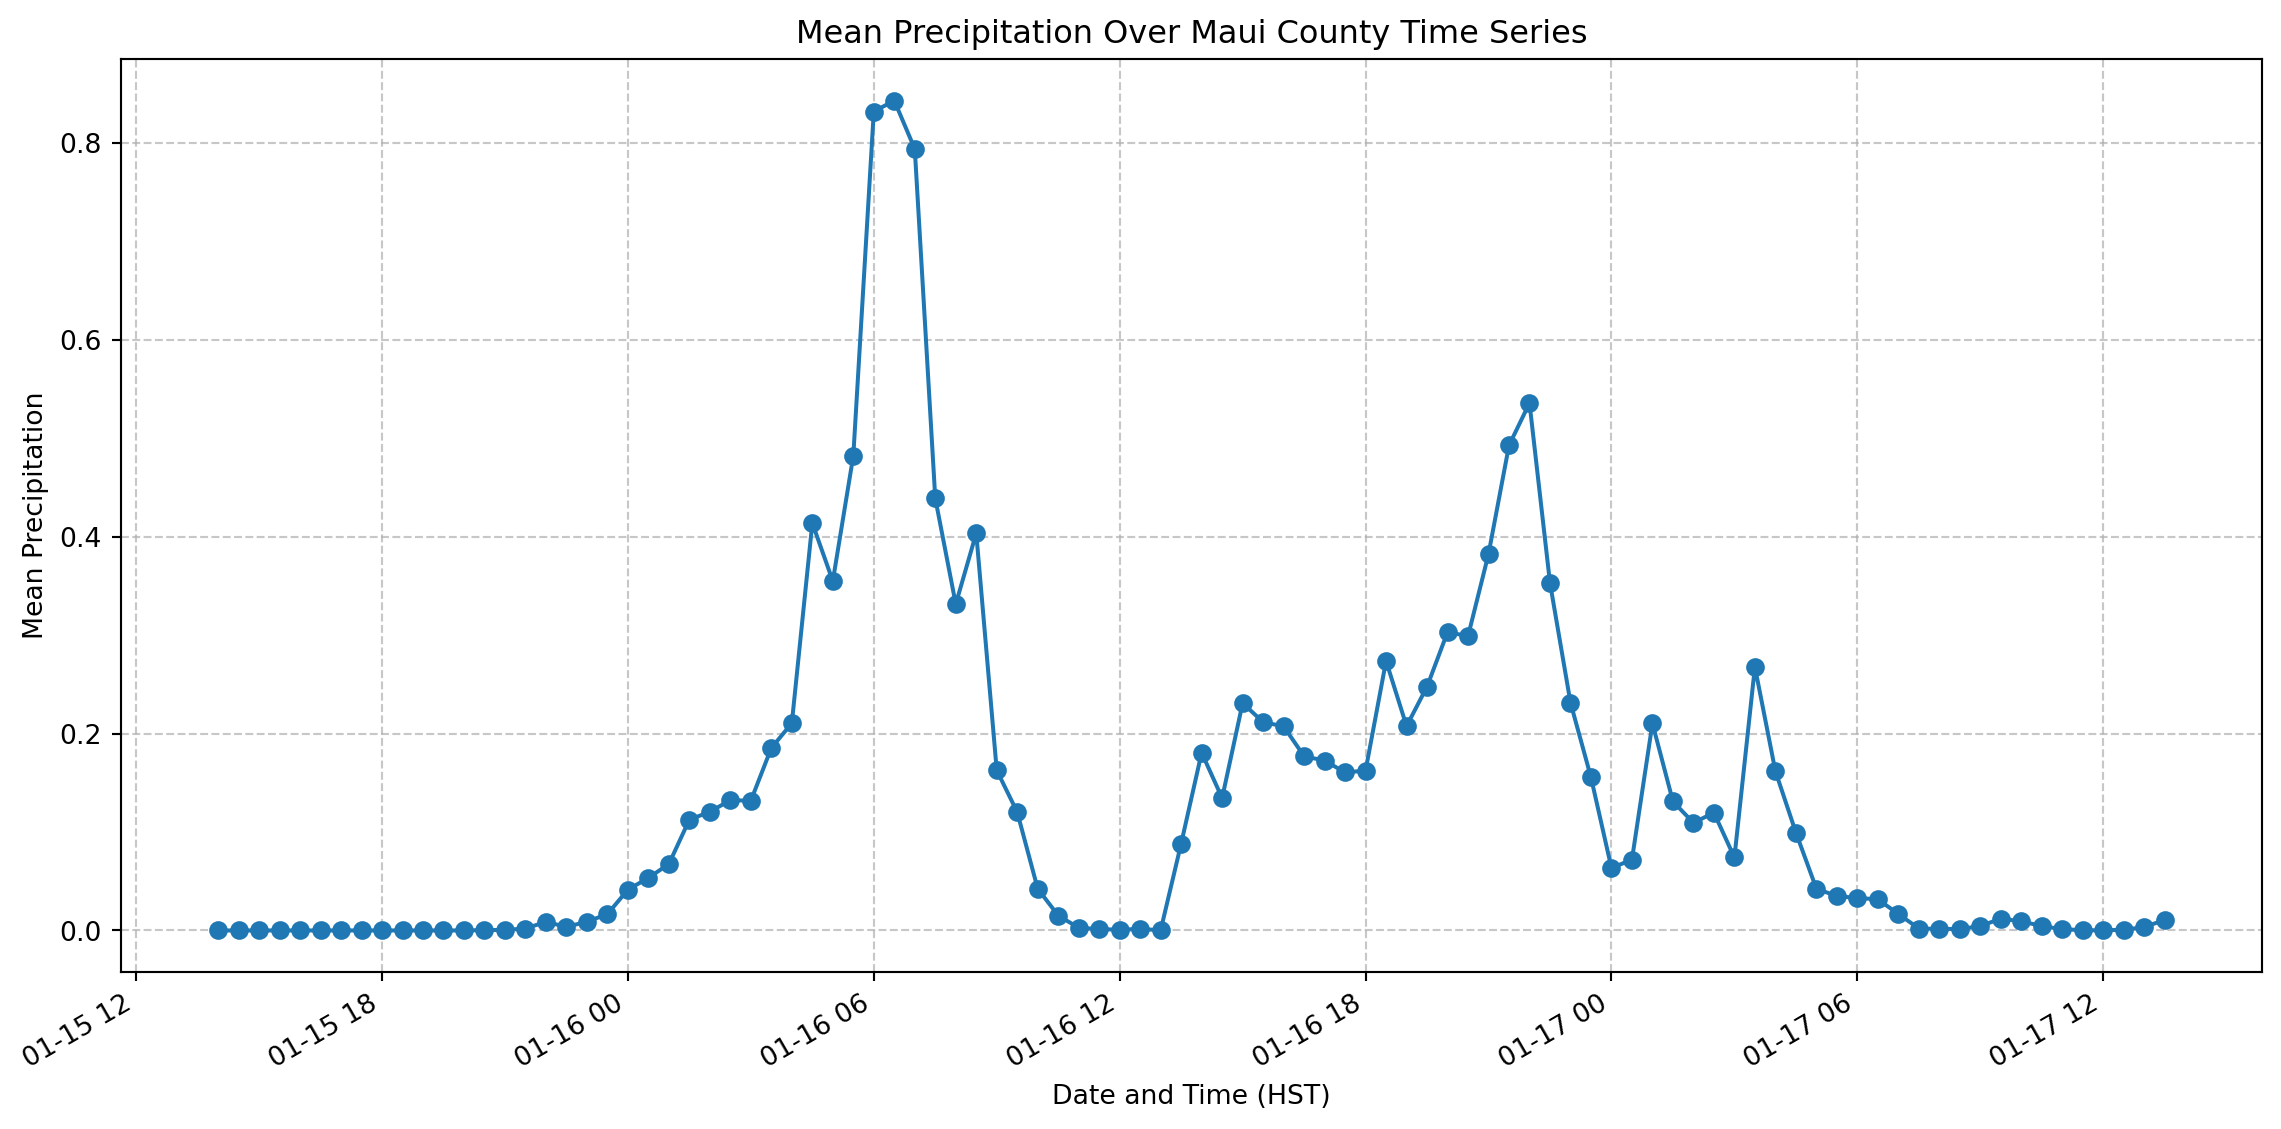

In [13]:
# Create the time series line plot
plt.figure(figsize=(12, 6))  # Set figure size for clarity and legibility

# Plot datetime vs. mean precipitation with markers and connecting lines
plt.plot(results_df['datetime'], results_df['mean_precip'], marker='o', linestyle='-')

# Add a title and axis labels to describe the plot
plt.title('Mean Precipitation Over Maui County Time Series')     # Plot title
plt.xlabel('Date and Time (HST)')                                 # X-axis label
plt.ylabel('Mean Precipitation')                                  # Y-axis label (units assumed mm/hr)

# Automatically format x-axis to prevent overlapping date labels
plt.gcf().autofmt_xdate()  # Rotate and align date labels on the x-axis

# Add a dashed grid to the background for easier reading
plt.grid(True, linestyle='--', alpha=0.7)  # Enable grid with light dashed lines

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Display the plot in the output cell
plt.show()